<a href="https://colab.research.google.com/github/DianaBravoPerez/EDP-1/blob/main/richardson_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Método implícito de Richardson

Escribir el problema a resolver, la ecuación en diferencias del método y explicar de manera concisa.

In [ ]:
# Librerías principales: álgebra simbólica, cálculo numérico y gráficas
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D
from matplotlib import cm               # colormap

Se define la función de datos iniciales $f(x)$, que en este problema es $f(x)=\sin(\pi x)$.

In [ ]:
# Función de condición inicial f(x) = sin(pi x)
def f(x):
    return np.sin(np.pi * x)

Definimos la matriz tridiagonal $A$

In [ ]:
A = sp.Matrix([[3,-1, 0, 0, 0, 0, 0, 0, 0],
              [-1, 3,-1, 0, 0, 0, 0, 0, 0],
              [0, -1, 3,-1, 0, 0, 0, 0, 0],
              [0, 0, -1, 3,-1, 0, 0, 0, 0],
              [0, 0, 0, -1, 3,-1, 0, 0, 0],
              [0, 0, 0, 0, -1, 3,-1, 0, 0],
              [0, 0, 0, 0, 0, -1, 3,-1, 0],
              [0, 0, 0, 0, 0, 0, -1, 3,-1],
              [0, 0, 0, 0, 0, 0, 0, -1, 3,]])

**Ejercicio 1**: Codificar la matriz A de manera más simple.

Primero se fija `n = 9`, así la matriz es de tamaño 9x9. Luego uso `sp.Matrix(n, n, lambda i, j: ...)`, donde se coloca 3 cuando `i == j`, −1 cuando `abs(i - j) == 1` y 0 en los demás casos

In [ ]:
# Tamaño de la matriz (en este caso 9x9)
n = 9

# Matriz tridiagonal: 3 en la diagonal principal, -1 en las diagonales vecinas, 0 en el resto
A = sp.Matrix(n, n, lambda i, j: 3 if i == j else (-1 if abs(i - j) == 1 else 0))

A

Matrix([
[ 3, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  3, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  3, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  3, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  3, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  3, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  3, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  3, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  3]])

In [ ]:
b = sp.Matrix([f(0.1), f(0.2), f(0.3), f(0.4), f(0.5), f(0.6), f(0.7), f(0.8), f(0.9)])

**Ejercicio 2**: Definir las entradas de b de manera más simple (quizás con un bucle).

Se define el vector $b$ evaluando la función $f(x)$ en los puntos interiores de la malla.  
Se usan los nodos $x_i = 0.1, 0.2, \dots, 0.9$

`sp.Matrix` sirve para crear una matriz que contiene una "lista" de valores $f(x)$.

`[f(i/10) for i in range(1, 10)]` es una **comprensión de lista**:
genera los valores $f(x)$ para cada $i$ en `range(1, 10)`.

El `range(1, 10)` recorre los enteros $i = 1, 2, \dots, 9$.

Cada valor se evalúa en el punto
$
x_i = \frac{i}{10} = 0.1,\ 0.2,\dots,0.9.
$

De esta forma, la matriz $b$ queda formada por
$
b = \big(f(0.1), f(0.2),\dots,f(0.9)\big)^T
$

In [ ]:
b = sp.Matrix([f(i / 10) for i in range(1, 10)])


Imprimimos:

In [ ]:
A

Matrix([
[ 3, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  3, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  3, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  3, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  3, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  3, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  3, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  3, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  3]])

In [ ]:
b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

In [ ]:
A.LUsolve(b)

Matrix([
[0.281465217775586],
[0.535378658951812],
[0.736885506787377],
[ 0.86626086703537],
[ 0.91084057802358],
[ 0.86626086703537],
[0.736885506787377],
[0.535378658951812],
[0.281465217775587]])

Esta función es solo de prueba. La puede omitir para optimizar la presentación.

`b_1 = b` guarda el vector inicial de la solución.

`for i in range(j+1)` ejecuta el ciclo de tiempo, con \(j+1\) iteraciones.

`A.LUsolve(b_1)` resuelve el sistema lineal \(A\,u^{k+1} = u^{k}\) usando la factorización LU.

`b_1 = sol` actualiza el vector con la nueva solución.

La función regresa `b_1`, es decir, la solución en el último tiempo.

In [ ]:
def richardson_1(A, b, j):
    b_1 = b
    for i in range(j+1):
        sol = A.LUsolve(b_1)
        b_1 = sol
        _ = None #Para que no imprima resultados parciales
    return b_1

In [ ]:
richardson_1(A, b, 3)

Matrix([
[0.212692337894623],
[0.404564867841463],
[  0.5568357697548],
[0.654599706821597],
[0.688286863720354],
[0.654599706821597],
[  0.5568357697548],
[0.404564867841463],
[0.212692337894623]])



`S = []` crea una lista vacía para guardar cada iteración de la solución.

`b_1 = b.copy()` copia el vector inicial \(b\) para no modificar el original.

`for i in range(j+1)` recorre todas las iteraciones de tiempo.

`S.append(np.array(b_1, dtype=float).reshape(-1))` guarda en `S` el vector \(u^{k}\) de la iteración actual.

`sol = A.LUsolve(b_1)` calcula la siguiente solución \(u^{k+1}\) resolviendo el sistema lineal.

`b_1 = sol` actualiza el vector para la siguiente vuelta del ciclo.

`return np.array(S)` devuelve una matriz \(U\), donde cada renglón contiene los valores \(u(x_i, t_k)\) en cada tiempo.

In [ ]:
def richardson(A, b, j):
    S = []
    b_1 = b.copy()

    for i in range(j+1):
        S.append(np.array(b_1, dtype=float).reshape(-1))  # vector fila
        sol = A.LUsolve(b_1)
        b_1 = sol

    return np.array(S)   # matriz resultado

**Ejercicio 4**: Graficar para un valor particular de t > 0 y comparar contra la gráfica de la solución exacta (quizás necesite calcularla).  

definimos las variables principales del tiempo.

$j$ es el número total de iteraciones.  
$t$ es el tiempo final del experimento.  
$dt = t/j$ es el tamaño del paso de tiempo.

La función `u_exacta(x,t)` calcula la solución analítica del problema:
$
u_{\text{exacta}}(x,t) = e^{-\pi^{2} t}\,\sin(\pi x),
$
que se usa para comparar con la solución numérica

In [17]:
# Variables de tiempo
j = 60          # Número de iteraciones
t = 0.6         # Tiempo total
dt = t / j      # Tamaño de paso en el tiempo

# Solución exacta u(x,t) = e^{-pi^2 t} sin(pi x)
def u_exacta(x, t, alpha=1.0):
    return np.exp(-alpha * (np.pi**2) * t) * np.sin(np.pi * x)

Con esto obtenemos la solución numérica y la malla espacial.

`U = richardson(A, b, j)` guarda en una matriz todas las iteraciones del método de Richardson.

La variable `x` contiene los puntos interiores del intervalo $(0,1)$ donde se evalúa la solución, formando la malla espacial.

In [18]:
# Solución numérica con el método de Richardson
U = richardson(A, b, j)

# Malla espacial en (0,1) usando los nodos interiores
N = U.shape[1]
x = np.linspace(0, 1, N + 2)[1:-1]   # de 0 a 1, quitando las fronteras

Aquí se selecciona un tiempo intermedio para hacer la comparación.

`mitad = int(j*0.5)` toma la mitad de las iteraciones.  
`t_m = mitad * dt` es el tiempo correspondiente a la mitad.  

`u_m = U[mitad, :]` son los valores numéricos de la solución en ese tiempo.  
`u_ex = u_exacta(x, t_m)` calcula los valores de la solución exacta en los mismos puntos $x$ y en el tiempo $t_m$.

In [19]:
# Iteración y tiempo intermedio
mitad = int(j * 0.5)   # mitad de las iteraciones
t_m = mitad * dt       # tiempo intermedio

# Solución numérica y exacta en t_m
u_m = U[mitad, :]               # valores numéricos en t_m
u_ex = u_exacta(x, t_m, 1.0)    # valores exactos en t_m

pasamos los resultados a matrices de `sympy` para trabajar más cómodo.

`v_ex = sp.Matrix(u_ex)` guarda el vector de la solución exacta.  
`v_es = sp.Matrix(u_m)` guarda el vector de la solución numérica (estimada).


In [21]:
# Guardamos los valores en matrices de sympy
v_ex = sp.Matrix(u_ex)   # valor exacto
v_es = sp.Matrix(u_m)    # valor estimado
v_ex, v_es

(Matrix([
 [0.0159988197362701],
 [0.0304315635264224],
 [0.0418854538494377],
 [ 0.049239304116553],
 [0.0517732682263353],
 [ 0.049239304116553],
 [0.0418854538494377],
 [0.0304315635264224],
 [0.0159988197362701]]),
 Matrix([
 [0.0187608914640572],
 [0.0356853361567954],
 [0.0491166515121494],
 [0.0577400868016604],
 [0.0607115200961845],
 [0.0577400868016604],
 [0.0491166515121494],
 [0.0356853361567954],
 [0.0187608914640571]]))

comparamos, punto por punto, la solución exacta con la numérica.

El ciclo `for` recorre cada posición $x_i$ y muestra:

- el valor exacto
- el valor estimado por el método  
- la diferencia absoluta entre los dos

De esta forma se observa numéricamente el error del método en cada punto.

In [22]:
print("Valor exacto       | Valor estimado    | Diferencia")
for i in range(len(v_ex)):
    ve = float(v_ex[i])
    vn = float(v_es[i])
    print(f"{ve:.12f} | {vn:.12f} | {abs(ve - vn):.12f}")

Valor exacto       | Valor estimado    | Diferencia
0.015998819736 | 0.018760891464 | 0.002762071728
0.030431563526 | 0.035685336157 | 0.005253772630
0.041885453849 | 0.049116651512 | 0.007231197663
0.049239304117 | 0.057740086802 | 0.008500782685
0.051773268226 | 0.060711520096 | 0.008938251870
0.049239304117 | 0.057740086802 | 0.008500782685
0.041885453849 | 0.049116651512 | 0.007231197663
0.030431563526 | 0.035685336157 | 0.005253772630
0.015998819736 | 0.018760891464 | 0.002762071728


Finalmente realizamos la gráfica de comparación.

`plt.plot(x, v_es, ...)` dibuja la curva de la solución numérica.  
`plt.plot(x, v_ex, ...)` dibuja la curva de la solución exacta en los mismos puntos.



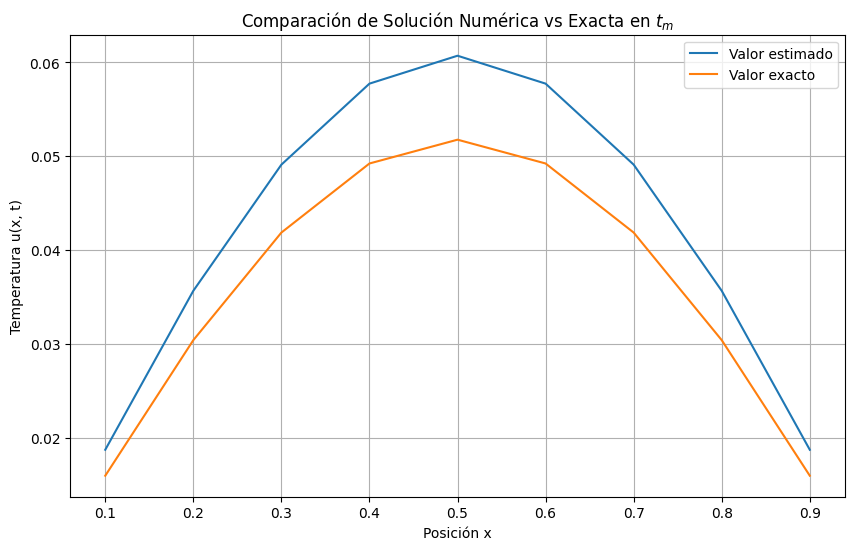

In [23]:
# Conversión a arreglos de numpy para graficar
x_np   = np.array(x, dtype=float)
y_num  = np.array(v_es, dtype=float).flatten()
y_exac = np.array(v_ex, dtype=float).flatten()

plt.figure(figsize=(10, 6))
plt.plot(x_np, y_num,  label='Valor estimado')
plt.plot(x_np, y_exac, label='Valor exacto')

plt.title('Comparación de Solución Numérica vs Exacta en $t_m$')
plt.xlabel('Posición x')
plt.ylabel('Temperatura u(x, t)')
plt.legend()
plt.grid(True)
plt.show()

**Ejercicio 5**:¿Es necesario resolver el sistema de 9 x 9 o podemos hacer una simplificación?

En este problema la solución es simétrica respecto al punto medio del intervalo, es decir
\[
u(x,t) = u(1-x,t).
\]
Eso significa que el valor en \(x = 0.2\) es el mismo que en \(x = 0.8\), el de \(x = 0.3\) coincide con el de \(x = 0.7\), etc.

Por esta simetría no sería estrictamente necesario resolver todas las incógnitas: solo con calcular la solución en los nodos de la mitad del dominio (del lado izquierdo) y los valores del lado derecho se pueden reconstruir usando la relación \(u(x,t) = u(1-x,t)\).  


In [24]:
j = 20 # Número de pasos en el tiempo

In [25]:
U=richardson(A, b, j)

In [26]:
x = np.linspace(0, 1, 9) #Número de nodos internos en X
y = np.linspace(0, 0.6, j+1) #Debe coincidir con el tamaño de j por k (tiempo)
X, Y = np.meshgrid(x, y)

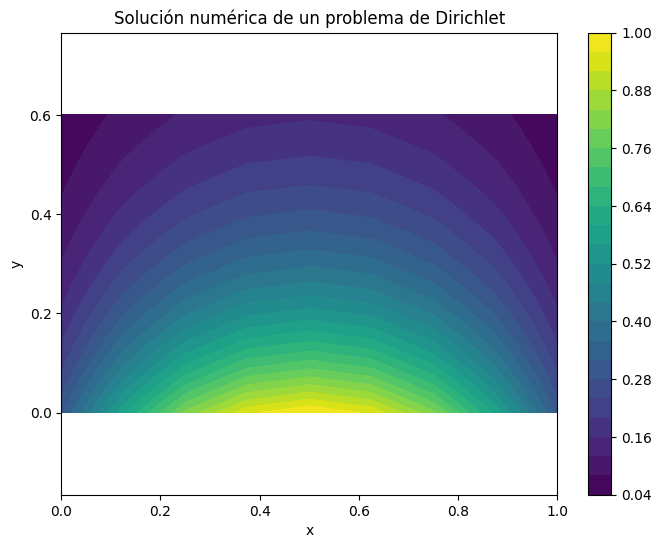

In [27]:
# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de un problema de Dirichlet')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

Explicar la gráfica

In [ ]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuación del calor con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Explicar la gráfica

**Ejercicio 6**: Hay un ligero detalle con la precisión de estas gráficas, ¿cuál?

#### Rúbrica:


|   Criterio | Calificación|
|:----------:|:-----------:|
| Presentación    |  10 puntos   |  
| Comentarios  |  10 puntos   |
| Documentación  |  10 puntos   |
| Funcionamiento  |  10 puntos   |
| Corrección  |  10 puntos   |
| Ejercicios  |  40 puntos   |
| Autonomía  |  10 puntos   |



**Comentarios**: Explicación breve y concisa sobre los bloques de códigos, funciones, etc.<br>
**Documentación**: Anotaciones sobre la sintaxis de Python: verisones, uso de librerías, estructuras, funciones búcles, etc. Solo lo que no sea obvio. <br>
**Presentación**: Uso profesional de texto, imágenes, tablas, ecuaciones para completar la Notebook (Que esta pueda usarse en una presentación).<br>
**Ejercicios**: Presenta la solución completa correcta de los ejercicios propuestos.<br>
**Funcionamiento**: El código se puede ejecutar sin errores.<br>
**Corrección**: El código devuelve las funciones correctas.<br>
**Autónomia**: Uso razonado e inteligente de la IA. Por ética, su uso causará la mínima calificación global.<br>



Material extra. Si lo desea, incorpore el material que pueda aprovechar en el lugar conveniente.

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(8,5))
line, = ax.plot(x, U[0], lw=2)
ax.set_ylim(np.min(U), np.max(U))
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Evolución en el tiempo')

def update(k):
    line.set_ydata(U[k])
    ax.set_title(f'tiempo = {y[k]:.3f}')
    return line,

anim = FuncAnimation(fig, update, frames=len(y), interval=200)
plt.show()

In [ ]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis)
plt.show()

In [ ]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

def update(k):
    ax.clear()
    ax.plot_surface(X, Y, U, cmap=cm.viridis)   # superficie completa
    ax.plot(x, y[k]*np.ones_like(x), U[k], color='r', lw=3)  # curva que se mueve
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('u')
    ax.set_title(f"Iteración / Tiempo: {k}")
    return []

anim = FuncAnimation(fig, update, frames=len(y), interval=200)
plt.show()


In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import numpy as np

# U ya viene de:
# U = richardson(A, b, j)
# y y x ya están definidos

fig, ax = plt.subplots(figsize=(8, 5))
line, = ax.plot(x, U[0], lw=2, color='blue')

ax.set_ylim(np.min(U), np.max(U))
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Evolución en el tiempo')

def update(k):
    line.set_ydata(U[k])
    ax.set_title(f'Tiempo = {y[k]:.3f}')
    return line,

anim = FuncAnimation(fig, update, frames=len(y), interval=200)

# Guardar como GIF
writer = PillowWriter(fps=6)
anim.save("animacion.gif", writer=writer)

print("Listo: archivo guardado como animacion.gif")
